In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

## 샤넬

In [3]:
mag_ch = pd.read_csv('./magazine/final/magazine_ch_stickword.csv', sep ='|', encoding = 'utf-8')

In [4]:
mag_ch['word'] = mag_ch['word_chanel']

In [5]:
mag_CH = mag_ch[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [6]:
len(mag_CH)

1450

In [7]:
for i in range(len(mag_CH)):
    if '예쁜' in mag_CH.loc[i, 'ADFN_2']:
        print(i, mag_CH.loc[i, 'ADFN_2'])
        print('-'* 50)

24 ['간', '얼루어', '그린', '이슈', '얼루어', '그린', '캠페인', '진행', '많은', '부분', '많은', '습관', '몸', '에코', '텀블러', '사용', '일상생활', '신경', '대부분', '편이', '포장재', '잔뜩', '새벽', '배송', '서비스', '배달', '음식', '서비스', '이용', '그럼에도', '포기', '없는', '아이템', '소비', '예쁜', '걸', '없었다', '미니멀리즘', '유혹', '환경윤리', '갈등', '고민', '끝', '결론', '걸', '좋아하는', '문학', '영화', '미식', '여행', '좋아하듯', '옷', '신발', '가방', '좋아한다', '공통점', '좋아하는', '게', '게', '가끔', '슬펐다', '누군가', '천재', '있는데', '이유', '쓸데없는', '취급', '좋은', '개성', '부여', '블라우스', '펌프스', '디테일', '금세', '감동', '지갑', '연', '그랬기에', '제인', '폰다', '선언', '더없이', '아프게', '감동', '구매', '옷', '신발', '가방', '끊임없이', '유행', '변덕', '나이', '여러', '이유', '짐', '더미', '이기', '친한', '에디터', '스타일', '리스트', '에디터', '스', '마켓', '이름', '플리', '마켓', '열기', '기부', '플리', '마켓', '장사', '그럼에도', '리지', '늘', '있고', '짐', '더미', '소비', '있고', '소비', '물건', '생명력', '마련', '거', '이건', '수도', '없고', '쓰레기', '탄소', '발생', '제인', '폰', '다처', '럼', '앞', '옷', '안', '산다', '선언', '물건', '관리', '어떨까', '안', '옷', '새로운', '생명', '부여', '수도', '있지', '그렇다면', '죄책감', '작년', '코펜하겐', '거리', '수많은', '빈티지지숍', '정체', '알', '없는

In [8]:
'예쁘고', '예쁘진', '예쁘냐가', '예쁘게', '예쁘면서도', '예쁜'

('예쁘고', '예쁘진', '예쁘냐가', '예쁘게', '예쁘면서도', '예쁜')

In [9]:
'귀여운', '귀엽고', '귀여워서', '귀여워'

('귀여운', '귀엽고', '귀여워서', '귀여워')

In [10]:
idx9 = []
for i in range(len(mag_CH)):
    if i % 9 == 0 :
        idx9.append(i)

In [11]:
mag_CH9 = mag_CH.loc[idx9]

In [12]:
mag_CH9.reset_index(drop = True, inplace = True)

In [13]:
# idx8 = []
# for i in range(len(mag_CH)):
#     if i % 8 == 0 :
#         idx8.append(i)

In [14]:
# mag_CH8 = mag_CH.loc[idx8]

In [15]:
# mag_CH8.reset_index(drop = True, inplace = True)

In [16]:
# idx7 = []
# for i in range(len(mag_CH)):
#     if i % 7 == 0 :
#         idx7.append(i)

In [17]:
# mag_CH7 = mag_CH.loc[idx7]

In [18]:
# mag_CH7.reset_index(drop = True, inplace = True)

## 지수

### 지수 (유튜브 + 매거진)

In [19]:
tot_ji = pd.read_csv('./magazine/final/video_jisu_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [20]:
tot_ji['word'] = tot_ji['word_jisu']

In [21]:
tot_JI = tot_ji[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [22]:
len(tot_JI)

158

### 샤넬 + 지수

In [23]:
CH9JI = pd.concat([mag_CH9, tot_JI])

In [24]:
CH9JI.reset_index(drop = True, inplace = True)

In [25]:
CH9JI.to_csv('./magazine/final/CH9JI.csv', sep = '|', encoding = 'utf-8', index = False)

In [26]:
len(CH9JI)

320

### 8

In [27]:
# CH8L = pd.concat([mag_CH8, tot_L])

In [28]:
# CH8L.reset_index(drop = True, inplace = True)

In [29]:
# CH8L.to_csv('./magazine/final/CH8L.csv', sep = '|', encoding = 'utf-8', index = False)

In [30]:
# len(CH8L)

### 7

In [31]:
# CH7L = pd.concat([mag_CH7, tot_L])

In [32]:
# CH7L.reset_index(drop = True, inplace = True)

In [33]:
# CH7L.to_csv('./magazine/final/CH7L.csv', sep = '|', encoding = 'utf-8', index = False)

In [34]:
# len(CH7L)

## stopword 추가

In [35]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [36]:
sw_df.columns = ['stopword']

In [37]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [38]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [39]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [40]:
add_0 = ['해', '하는', '할', '한', '영상', '했다', '뭐', '넘', '수', '정말', '그냥', '보고', '있는',
         '전소민', '공유', '양세찬', '항상', '다시', '통해', '한편', 'a', '공개', '자체', '형', '와중', '↑', '걸',
         '있습니다', 'to', '아닌데', '있는데', '보기', '하다', '곤', '없어', '대한', '싶다', '명', '민','the',
         '보니', '아는', '전', '진짜', '멤버', '잘', '모습', '발음', '제일', '기자', '데뷔', '아는', '택시', 
         '활동', '썸네일', '나도', '가사', '하네요', '길다', '보이는', '까', '없는데', '몰랐는데', '대해', 
         '보인다', '위해', '로서', '이수근', '보여', '있으면', '보다', '같네', '하자', '최수영', 'that', 
         '하며', '세찬', '않고', '됨', '오는', '사이', '아주', '진행', '채', '이자',
        '진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히']
for w in add_0:
    stop_words.append(w)

In [41]:
add_1 = ['BLACKPINK', '제니', '리사', '로제']
for w in add_1:
    stop_words.append(w)

In [42]:
len(stop_words)

899

### 8

In [43]:
# CH8L['ADFN_2'] = CH8L['ADFN_2'].st?r.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [44]:
# noun_adj_list = []
# for i in range(len(CH8L)):
#     for word in CH8L.loc[i, 'ADFN_2']:
#         if word not in stop_words:
#             noun_adj_list.append(word)

In [45]:
# word = Counter(noun_adj_list)
# print(word.most_common(200))

In [46]:
# count = Counter(noun_adj_list)

In [47]:
# word_list = count.most_common(500)
# for v in word_list:
#     print(v)

### 9

In [48]:
CH9JI['ADFN_2'] = CH9JI['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [49]:
noun_adj_list = []
for i in range(len(CH9JI)):
    for word in CH9JI.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [50]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('지수', 4231), ('예쁘다', 1889), ('귀엽다', 740), ('CHANEL', 601), ('얼굴', 521), ('사랑', 467), ('노래', 391), ('매력', 294), ('DIOR', 257), ('목소리', 239), ('음악', 239), ('스타일', 211), ('춤', 166), ('아이돌', 162), ('브랜드', 158), ('모델', 148), ('실력', 148), ('최고', 147), ('라이브', 129), ('세계', 127), ('성격', 126), ('음색', 124), ('배우', 122), ('블랙', 121), ('디자인', 112), ('사랑스럽다', 112), ('여자', 109), ('여신', 107), ('외모', 105), ('쇼', 102), ('여성', 102), ('장식', 101), ('드레스', 100), ('메이크업', 100), ('분위기', 96), ('핑크', 96), ('백', 95), ('무대', 94), ('KARL', 92), ('재킷', 89), ('새로운', 89), ('비주얼', 89), ('디자이너', 88), ('아름다운', 88), ('완성', 82), ('COUTURE', 81), ('라인', 73), ('하우스', 73), ('파리', 72), ('패션', 72), ('팬츠', 69), ('다양한', 69), ('솔로', 68), ('이미지', 67), ('레전드', 66), ('톱', 65), ('데님', 65), ('미국', 65), ('스타', 64), ('걸그룹', 64), ('주얼리', 61), ('화이트', 61), ('코트', 61), ('인기', 61), ('아이템', 60), ('느낌', 60), ('레드', 60), ('노력', 60), ('트위드', 59), ('친구', 59), ('매치', 59), ('가수', 58), ('팬', 58), ('빛', 57), ('드라마', 57), ('옷', 56), ('입덕', 56), ('

In [51]:
count = Counter(noun_adj_list)

In [52]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('지수', 4231)
('예쁘다', 1889)
('귀엽다', 740)
('CHANEL', 601)
('얼굴', 521)
('사랑', 467)
('노래', 391)
('매력', 294)
('DIOR', 257)
('목소리', 239)
('음악', 239)
('스타일', 211)
('춤', 166)
('아이돌', 162)
('브랜드', 158)
('모델', 148)
('실력', 148)
('최고', 147)
('라이브', 129)
('세계', 127)
('성격', 126)
('음색', 124)
('배우', 122)
('블랙', 121)
('디자인', 112)
('사랑스럽다', 112)
('여자', 109)
('여신', 107)
('외모', 105)
('쇼', 102)
('여성', 102)
('장식', 101)
('드레스', 100)
('메이크업', 100)
('분위기', 96)
('핑크', 96)
('백', 95)
('무대', 94)
('KARL', 92)
('재킷', 89)
('새로운', 89)
('비주얼', 89)
('디자이너', 88)
('아름다운', 88)
('완성', 82)
('COUTURE', 81)
('라인', 73)
('하우스', 73)
('파리', 72)
('패션', 72)
('팬츠', 69)
('다양한', 69)
('솔로', 68)
('이미지', 67)
('레전드', 66)
('톱', 65)
('데님', 65)
('미국', 65)
('스타', 64)
('걸그룹', 64)
('주얼리', 61)
('화이트', 61)
('코트', 61)
('인기', 61)
('아이템', 60)
('느낌', 60)
('레드', 60)
('노력', 60)
('트위드', 59)
('친구', 59)
('매치', 59)
('가수', 58)
('팬', 58)
('빛', 57)
('드라마', 57)
('옷', 56)
('입덕', 56)
('스커트', 55)
('카디건', 55)
('화보', 54)
('연기', 54)
('여름', 53)
('보컬', 53)
('자연', 52)
(

In [53]:
top500 = pd.DataFrame(word_list)

In [54]:
top500.columns = ['word', 'count']

In [55]:
top500.to_csv('./CH9JI_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [56]:
import matplotlib.pyplot as plt

In [57]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [58]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [59]:
from wordcloud import WordCloud

In [60]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

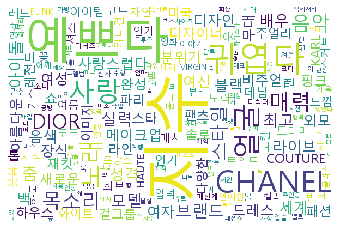

In [61]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('./final_img/wc_CH9JI_top500.png')

In [62]:
CH9JI.to_csv('./magazine/final/CH9JI_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)